<a href="https://colab.research.google.com/github/tombraganca/Inteligente-Artificial/blob/main/Quinto_Trabalho_Pr%C3%A1tico_sobre_Redes_Neurais_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Setup
# site: colab.research.google.com
# Logar com o e-mail da Puc
# Novo NoteBook

!pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install scikeras


import tensorflow as tf
print(tf.__version__)


import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Importando pacotes necessários
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

from scikeras.wrappers import KerasClassifier

In [5]:
# @title Exercicio 01 - Converter Dados de Entrada

data = pd.read_csv('/content/Materiais_Treinamento.txt')
data.head()
X = data.iloc[:,0:3]
scaler = StandardScaler()
Y1 = data.iloc[:,3]

In [ ]:
# @title Sanitizando dados
mapper = { "Dúctil": 0, "Frágil": 1 }

for lin in range(len(X)):
  for col in range(3):
    if col in [3]:
        X.iloc[lin, col] = mapper.get(X.iloc[lin, col], X.iloc[lin, col])


X

In [8]:
X = scaler.fit_transform(X)


for lin in range(len(Y1)):
  Y1.iloc[lin] = mapper.get(Y1.iloc[lin], Y1.iloc[lin])



In [ ]:


Y = pd.DataFrame(data=Y1.values,dtype=int,columns=['Tipo'])
# Ver Y
Y.head()



In [10]:
# @title Treinar Modelo

# Função para cria o modelo
def create_my_model(neuro1=3, neuro2=1):
    # create model
    mymodel = Sequential()
    mymodel.add(Dense(neuro1, input_dim=3, activation='relu'))
    mymodel.add(Dense(neuro2, activation='relu'))
    mymodel.add(Dense(1, activation='sigmoid'))
    # Compile model
    mymodel.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return mymodel

# Cria o modelo
model = KerasClassifier(build_fn=create_my_model, neuro1=2, neuro2=1, epochs=2000, batch_size=56)

# define os parametros de busca
neuro1 = [1, 2]
neuro2 = [1, 2]

# Cria o gride
parameter_grid = dict(neuro1=neuro1, neuro2=neuro2)

# Testa o gride
grid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)


# Mostra o resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/2000
1/1 [==============================] - 1s 796ms/step - loss: 0.6933 - accuracy: 0.5357
Epoch 2/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6929 - accuracy: 0.5357
Epoch 3/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6924 - accuracy: 0.5357
Epoch 4/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.6920 - accuracy: 0.5179
Epoch 5/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6916 - accuracy: 0.5179
Epoch 6/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.6912 - accuracy: 0.5179
Epoch 7/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.6909 - accuracy: 0.5179
Epoch 8/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6903 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6900 - accuracy: 0.5000
Epoch 11

In [11]:
# @title Treinar Modelo L

modelo = Sequential()
modelo.add(Dense(2, input_dim=3, activation='relu'))
#modelo.add(Dense(1, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
resultado = modelo.fit(X, Y, batch_size = 56, epochs = 2400)
modelo.summary()

Epoch 1/2400
1/1 [==============================] - 1s 621ms/step - loss: 0.7119 - accuracy: 0.5357
Epoch 2/2400
1/1 [==============================] - 0s 15ms/step - loss: 0.7114 - accuracy: 0.5357
Epoch 3/2400
1/1 [==============================] - 0s 16ms/step - loss: 0.7108 - accuracy: 0.5357
Epoch 4/2400
1/1 [==============================] - 0s 14ms/step - loss: 0.7103 - accuracy: 0.5357
Epoch 5/2400
1/1 [==============================] - 0s 12ms/step - loss: 0.7097 - accuracy: 0.5357
Epoch 6/2400
1/1 [==============================] - 0s 11ms/step - loss: 0.7092 - accuracy: 0.5357
Epoch 7/2400
1/1 [==============================] - 0s 11ms/step - loss: 0.7086 - accuracy: 0.5357
Epoch 8/2400
1/1 [==============================] - 0s 18ms/step - loss: 0.7081 - accuracy: 0.5357
Epoch 9/2400
1/1 [==============================] - 0s 20ms/step - loss: 0.7076 - accuracy: 0.5357
Epoch 10/2400
1/1 [==============================] - 0s 12ms/step - loss: 0.7070 - accuracy: 0.5357
Epoch 11

In [13]:
testes = pd.read_csv('/content/Materiais_Teste.txt')
testes.head()
Xtestes = testes.iloc[:,0:3]
Xtestes = scaler.fit_transform(Xtestes)
Xtestes

array([[-1.22406706, -0.98124461, -1.02880431],
       [-1.12818713, -1.42998452, -1.35493824],
       [ 0.15021188,  0.45472311,  0.66116242],
       [ 1.4286109 ,  0.99321101,  1.10589051],
       [ 1.58841078,  1.86077484,  1.69886129],
       [-0.80858738, -1.07099259, -1.11774993],
       [-0.6487875 ,  0.03589919, -0.10969959],
       [-0.42506767, -0.77183265, -0.791616  ],
       [-0.10546792,  0.15556317,  0.12748872],
       [ 1.1729311 ,  0.75388305,  0.80940512]])

In [14]:
# Testa a rede
Y_predito = modelo.predict(Xtestes)
print("Valores Preditos:",Y_predito)

reverse_mapper = { 0: "Dúctil", 1: "Frágil" }
Y_predito1 = np.array([])
Y_Resposta1 = np.array([])
for i in Y_predito:
    Resp = [reverse_mapper.get(1 if i > 0.5 else 0) + " - " + str(1 if i > 0.5 else 0)]
    Y_Resposta1 = np.concatenate((Y_Resposta1, Resp))
print(Y_Resposta1) # Ver os Resuladados
Y_Resposta = pd.DataFrame(data=Y_Resposta1, dtype=np.str0, columns=['Dúcil ou Frágil'])
Y_Resposta # Ver a Resposta

1/1 [==============================] - 0s 90ms/step
Valores Preditos: [[0.17669277]
 [0.87354076]
 [0.04062548]
 [0.86989015]
 [0.01234385]
 [0.87354076]
 [0.00287276]
 [0.87354076]
 [0.06359223]
 [0.87354076]]
['Dúctil - 0' 'Frágil - 1' 'Dúctil - 0' 'Frágil - 1' 'Dúctil - 0'
 'Frágil - 1' 'Dúctil - 0' 'Frágil - 1' 'Dúctil - 0' 'Frágil - 1']


,Dúcil ou Frágil
0,Dúctil - 0
1,Frágil - 1
2,Dúctil - 0
3,Frágil - 1
4,Dúctil - 0
5,Frágil - 1
6,Dúctil - 0
7,Frágil - 1
8,Dúctil - 0
9,Frágil - 1


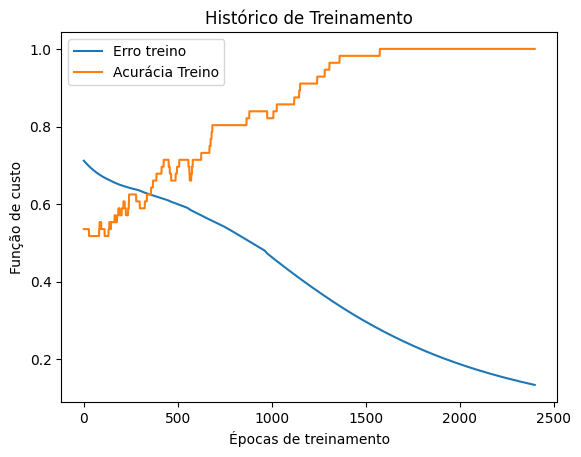

In [15]:
# Mostra Resultado
import matplotlib.pyplot as plt
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['accuracy'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Acurácia Treino'])
plt.show()

In [16]:

# Mostra Pesos
for layerNum, layer in enumerate(modelo.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]

    for toNeuronNum, bias in enumerate(biases):
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')

    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'L{layerNum}N{fromNeuronNum} \
                  -> L{layerNum+1}N{toNeuronNum} = {wgt2}')

0B -> L1N0: 0.6898500323295593
0B -> L1N1: -0.3668297231197357
L0N0                   -> L1N0 = -2.093545913696289
L0N0                   -> L1N1 = 0.05701907351613045
L0N1                   -> L1N0 = 2.4912514686584473
L0N1                   -> L1N1 = -0.3758915066719055
L0N2                   -> L1N0 = -0.14855943620204926
L0N2                   -> L1N1 = 0.27089494466781616
1B -> L2N0: 1.932634711265564
L1N0                   -> L2N0 = -3.613180637359619
L1N1                   -> L2N0 = -0.4379239082336426
